In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import re
import pylab

In [3]:
business_df= pd.read_csv("D:/csv/yelp_academic_dataset_business.csv")
review_df= pd.read_csv("D:/csv/yelp_academic_dataset_review.csv")

In [4]:
business_df.city.value_counts()

Las Vegas                     22892
Toronto                       14540
Phoenix                       14468
Scottsdale                     6917
Charlotte                      6912
Pittsburgh                     5275
Montréal                       4785
Mesa                           4714
Henderson                      3788
Tempe                          3703
Edinburgh                      3601
Chandler                       3325
Cleveland                      2785
Madison                        2711
Gilbert                        2574
Glendale                       2555
Mississauga                    2094
Stuttgart                      1955
Peoria                         1367
Markham                        1285
North Las Vegas                1154
Champaign                      1018
North York                      883
Surprise                        853
Scarborough                     781
Richmond Hill                   719
Goodyear                        646
Concord                     

In [5]:
#======Part 2======
city1="Las Vegas"
city2="Toronto"
city3="Phoenix"
#==================

#======Part 3======
selected_business="Restaurants"
#==================

#======Part 4======
analyse_city=True   #choose to analyse a city or a state
#==================


if analyse_city:
    selected_city="Las Vegas"
else:
    selected_state="NV"

print("Number of Businesses")
print(city1,":",len(business_df[business_df.city==city1]))
print(city2,":",len(business_df[business_df.city==city2]))
print(city3,":",len(business_df[business_df.city==city3]))

Number of Businesses
Las Vegas : 22892
Toronto : 14540
Phoenix : 14468


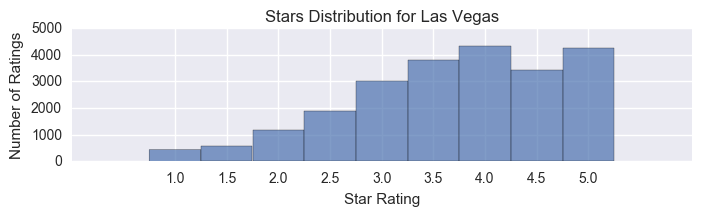

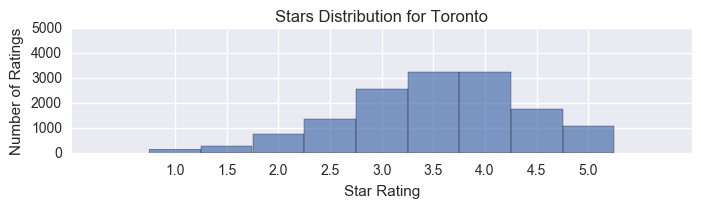

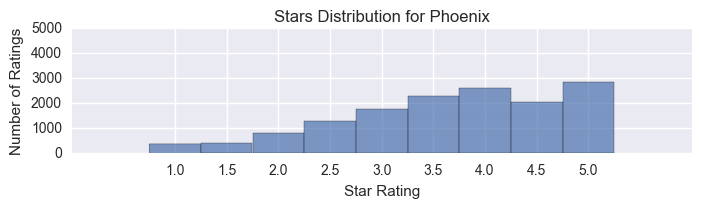

In [6]:
city1_df = business_df[business_df.city == city1]
city2_df = business_df[business_df.city == city2]
city3_df = business_df[business_df.city == city3]

plt.subplots_adjust(hspace=.1)
plt.subplot(311)
plt.hist(city1_df.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for {}".format(city1))
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
axes = plt.gca()
axes.set_ylim([0,5000])
plt.show()

plt.subplot(312)
plt.hist(city2_df.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for {}".format(city2))
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
axes = plt.gca()
axes.set_ylim([0,5000])
plt.show()

plt.subplot(313)
plt.hist(city3_df.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars Distribution for {}".format(city3))
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
axes = plt.gca()
axes.set_ylim([0,5000])

plt.show()

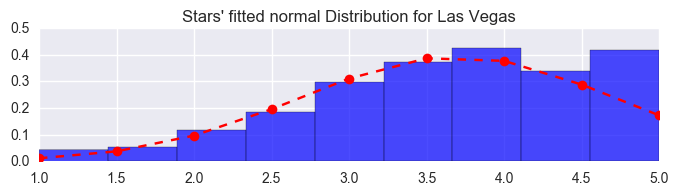

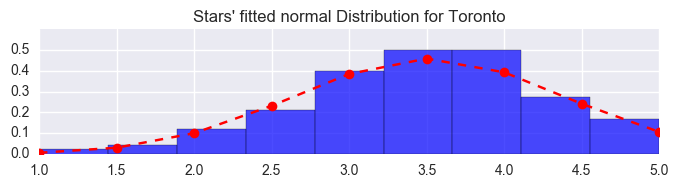

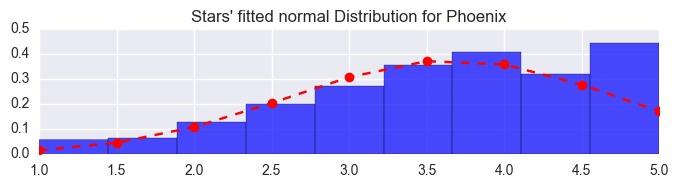

In [7]:
plt.subplots_adjust(hspace=.1)
plt.subplot(311)
(mu, sigma) = stats.norm.fit(city1_df['stars'])
n,bins, patches = plt.hist(city1_df['stars'], 9, normed = 1, facecolor = 'blue', alpha = 0.7)
bins1 = np.linspace(1,5,9)
y = mlab.normpdf(bins1,mu,sigma)
l = plt.plot(bins1,y,'ro--',mu,sigma)
plt.ylim(0,0.5)
plt.title("Stars' fitted normal Distribution for {}".format(city1))
plt.show()

plt.subplot(312)
(mu, sigma) = stats.norm.fit(city2_df['stars'])
n,bins, patches = plt.hist(city2_df['stars'], 9, normed = 1, facecolor = 'blue', alpha = 0.7)
bins2 = np.linspace(1,5,9)
y = mlab.normpdf(bins2,mu,sigma)
l = plt.plot(bins2,y,'ro--',mu,sigma)
plt.ylim(0,0.6)
plt.title("Stars' fitted normal Distribution for {}".format(city2))
plt.show()

plt.subplot(313)
(mu, sigma) = stats.norm.fit(city3_df['stars'])
n,bins, patches = plt.hist(city3_df['stars'], 9, normed = 1, facecolor = 'blue', alpha = 0.7)
bins3 = np.linspace(1,5,9)
y = mlab.normpdf(bins3,mu,sigma)
l = plt.plot(bins3,y,'ro--',mu,sigma)
plt.ylim(0,0.5)
plt.title("Stars' fitted normal Distribution for {}".format(city3))
plt.show()

In [10]:
stat_prop_stars_cities=pd.DataFrame({city1:list(scipy.stats.describe(city1_df.stars)),
                                     city2:list(scipy.stats.describe(city2_df.stars)),
                                     city3:list(scipy.stats.describe(city3_df.stars))
                                    },index=["nobs","min-max","mean","variance","skewness","kurtosis"])
stat_prop_stars_cities

,Las Vegas,Phoenix,Toronto
nobs,22892,14468,14540
min-max,"(1.0, 5.0)","(1.0, 5.0)","(1.0, 5.0)"
mean,3.69843,3.67238,3.51575
variance,1.02516,1.12533,0.758642
skewness,-0.567735,-0.57248,-0.400705
kurtosis,-0.318652,-0.414378,-0.093702


In [11]:
c1 = list(scipy.stats.describe(city1_df.stars))
print(c1.append(np.std(city1_df.stars)))

None


In [12]:
print("There are",len(business_df[business_df.categories.isnull()]),"businesses that have no business category")

There are 325 businesses that have no business category


In [13]:
diff_categories=[]
for i in business_df[business_df.categories.notnull()].categories:
    
    current_category=re.findall(r"[a-zA-Z0-9_/()\&\-<>?\*`~!@#$%^\+{};:| ]+[a-zA-Z0-9_/()\&\-<>?\*`~!@#$%^\+{};:| ]+",i)
    diff_categories+=current_category

diff_categories=set(diff_categories)

print("There are",len(diff_categories),"different business categories")

There are 1192 different business categories


In [18]:
selected_category_indexes=[]
for index in business_df[business_df.categories.notnull()].index:
    if re.search(r"\b{0}\b".format(selected_business),business_df.ix[index,"categories"]):
        selected_category_indexes.append(index)

selected_businesses=business_df.ix[selected_category_indexes]
print("There are",len(business_df.ix[selected_category_indexes]),selected_business,"businesses","in the whole dataset")

There are 48485 Restaurants businesses in the whole dataset


In [32]:
selected_category_indexes_1=[]
for index in city1_df[city1_df.categories.notnull()].index:
    if re.search(r"\b{0}\b".format(selected_business),city1_df.ix[index,"categories"]):
        selected_category_indexes_1.append(index)

selected_businesses=city1_df.ix[selected_category_indexes_1]
num_selected_businesses_1=len(city1_df.ix[selected_category_indexes_1])
print("There are",len(city1_df.ix[selected_category_indexes_1]),selected_business,"businesses",\
      "in {}'s dataset".format(city1))

There are 5431 Restaurants businesses in Las Vegas's dataset


In [33]:
selected_category_indexes_2=[]
for index in city2_df[city2_df.categories.notnull()].index:
    if re.search(r"\b{0}\b".format(selected_business),city2_df.ix[index,"categories"]):
        selected_category_indexes_2.append(index)

selected_businesses=city2_df.ix[selected_category_indexes_2]
num_selected_businesses_2=len(city2_df.ix[selected_category_indexes_2])
print("There are",len(city2_df.ix[selected_category_indexes_2]),selected_business,"businesses",\
      "in {}'s dataset".format(city2))

There are 6347 Restaurants businesses in Toronto's dataset


In [34]:
selected_category_indexes_3=[]
for index in city3_df[city3_df.categories.notnull()].index:
    if re.search(r"\b{0}\b".format(selected_business),city3_df.ix[index,"categories"]):
        selected_category_indexes_3.append(index)

selected_businesses=city3_df.ix[selected_category_indexes_3]
num_selected_businesses_3=len(city3_df.ix[selected_category_indexes_3])
print("There are",len(city3_df.ix[selected_category_indexes_3]),selected_business,"businesses",\
      "in {}'s dataset".format(city3))

There are 3353 Restaurants businesses in Phoenix's dataset


In [38]:
total_businesses_1 = len(business_df[business_df.city==city1])
total_businesses_2 = len(business_df[business_df.city==city2])
total_businesses_3 = len(business_df[business_df.city==city3])
percentage_1 = num_selected_businesses_1/total_businesses_1
percentage_2 = num_selected_businesses_2/total_businesses_2
percentage_3 = num_selected_businesses_3/total_businesses_3

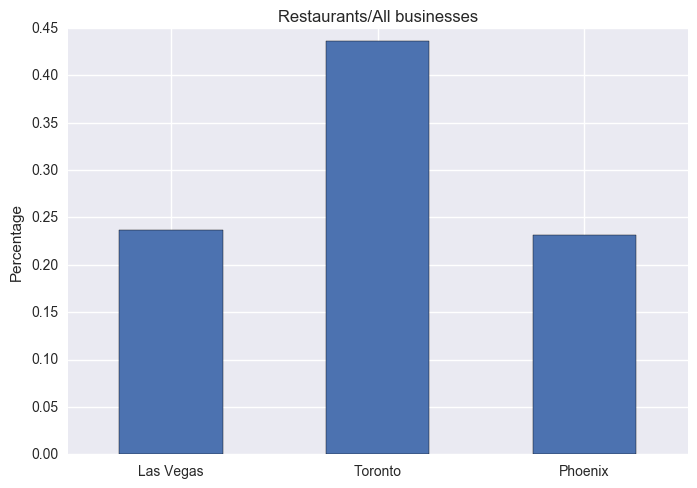

In [46]:
x_axis_indices = [0,1,2]
y_axis_indices = [percentage_1, percentage_2, percentage_3]
plt.bar(x_axis_indices, y_axis_indices, align = 'center', width = 0.5)
plt.xticks([0.0,1.0,2.0], ('{}'.format(city1),'{}'.format(city2),'{}'.format(city3)))
plt.ylabel('Percentage')
plt.title('{}/All businesses'.format(selected_business))
plt.show()

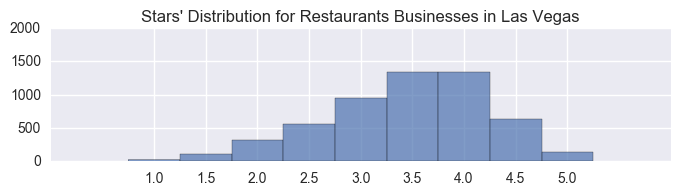

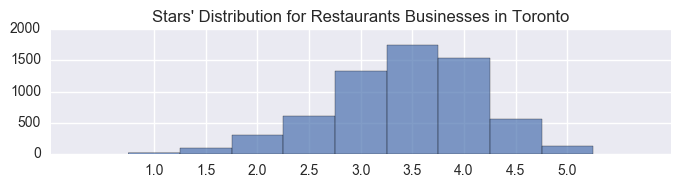

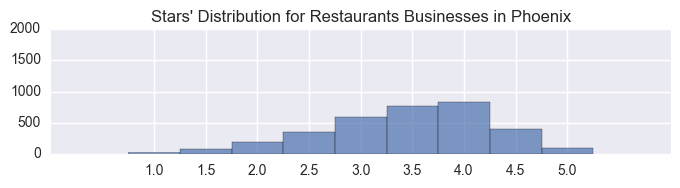

In [15]:
selected_businesses_city1 = selected_businesses[selected_businesses.city==city1]
selected_businesses_city2 = selected_businesses[selected_businesses.city==city2]
selected_businesses_city3 = selected_businesses[selected_businesses.city==city3]

plt.subplots_adjust(hspace=.1)
plt.subplot(311)
n_total, bins, patch = plt.hist(selected_businesses_city1.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for {} Businesses in {}".format(selected_business,city1))
axes = plt.gca()
axes.set_ylim([0,2000])
plt.show()

plt.subplot(312)
n_total, bins, patch = plt.hist(selected_businesses_city2.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for {} Businesses in {}".format(selected_business,city2))
axes = plt.gca()
axes.set_ylim([0,2000])
plt.show()

plt.subplot(313)
n_total, bins, patch = plt.hist(selected_businesses_city3.stars, bins=np.arange(1,6,0.5), alpha=0.7,align="left",normed=False,histtype="bar")
plt.xticks(np.arange(1,5.5,0.5))
plt.title("Stars' Distribution for {} Businesses in {}".format(selected_business,city3))
axes = plt.gca()
axes.set_ylim([0,2000])
plt.show()

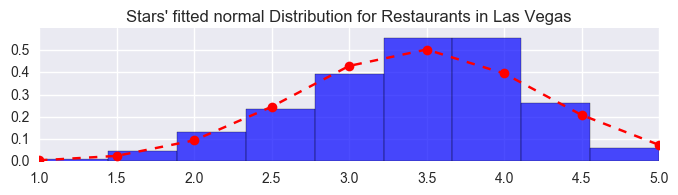

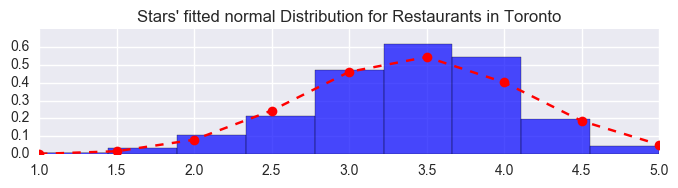

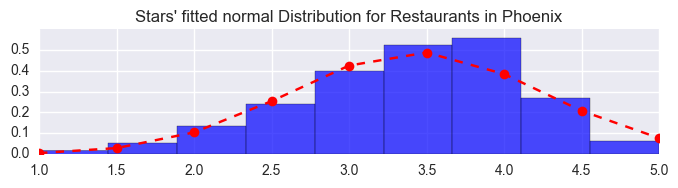

In [50]:
plt.subplots_adjust(hspace=.1)
plt.subplot(311)
(mu, sigma) = stats.norm.fit(selected_businesses_city1['stars'])
n,bins, patches = plt.hist(selected_businesses_city1['stars'], 9, normed = 1, facecolor = 'blue', alpha = 0.7)
bins4 = np.linspace(1,5,9)
y = mlab.normpdf(bins4,mu,sigma)
l = plt.plot(bins4,y,'ro--',mu,sigma)
plt.ylim(0,0.6)
plt.title("Stars' fitted normal Distribution for {} in {}".format(selected_business,city1))
plt.show()

plt.subplot(312)
(mu, sigma) = stats.norm.fit(selected_businesses_city2['stars'])
n,bins, patches = plt.hist(selected_businesses_city2['stars'], 9, normed = 1, facecolor = 'blue', alpha = 0.7)
bins5 = np.linspace(1,5,9)
y = mlab.normpdf(bins5,mu,sigma)
l = plt.plot(bins5,y,'ro--',mu,sigma)
plt.ylim(0,0.7)
plt.title("Stars' fitted normal Distribution for {} in {}".format(selected_business,city2))
plt.show()

plt.subplot(313)
(mu, sigma) = stats.norm.fit(selected_businesses_city3['stars'])
n,bins, patches = plt.hist(selected_businesses_city3['stars'], 9, normed = 1, facecolor = 'blue', alpha = 0.7)
bins6 = np.linspace(1,5,9)
y = mlab.normpdf(bins6,mu,sigma)
l = plt.plot(bins6,y,'ro--',mu,sigma)
plt.ylim(0,0.6)
plt.title("Stars' fitted normal Distribution for {} in {}".format(selected_business,city3))
plt.show()

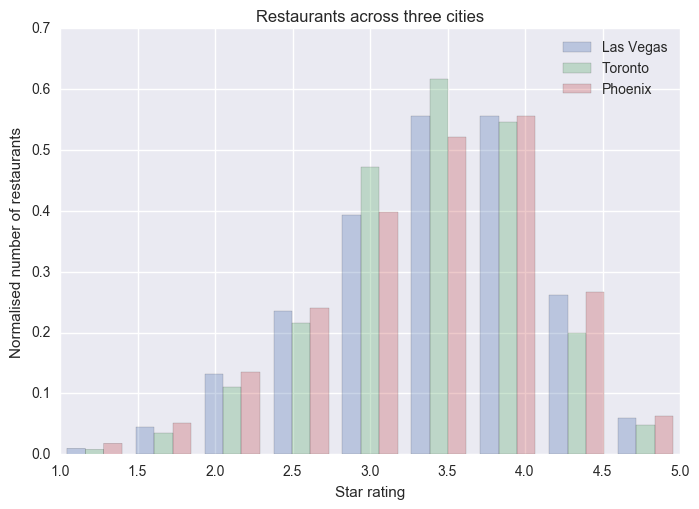

In [74]:
three_city_stars = [selected_businesses_city1.stars,selected_businesses_city2.stars,selected_businesses_city3.stars]
plt.hist(three_city_stars, alpha=.3,bins = 9,normed = True, label=['{}'.format(city1),\
                                                                  '{}'.format(city2),\
                                                                  '{}'.format(city3)])
plt.xlabel('Star rating')
plt.ylabel('Normalised number of restaurants')
plt.legend(loc='upper right')
plt.title('Restaurants across three cities')
plt.show()

In [71]:
selected_businesses_stat_prop_stars_cities=pd.DataFrame({city1:list(scipy.stats.describe\
                                                                    (selected_businesses_city1.stars)),
                                     city2:list(scipy.stats.describe(selected_businesses_city2.stars)),
                                     city3:list(scipy.stats.describe(selected_businesses_city3.stars))
                                    },index=["nobs","min-max","mean","variance","skewness","kurtosis"])
selected_businesses_stat_prop_stars_cities

,Las Vegas,Phoenix,Toronto
nobs,5431,3353,6347
min-max,"(1.0, 5.0)","(1.0, 5.0)","(1.0, 5.0)"
mean,3.44872,3.43275,3.42745
variance,0.625409,0.666642,0.534327
skewness,-0.448618,-0.482948,-0.408281
kurtosis,-0.128254,-0.097666,0.123253


### Part 4

In [76]:
if analyse_city:
    review_selected_city=review_df[review_df.business_id.isin(business_df[business_df.city==selected_city].business_id)]
    review_selected_region=review_selected_city
    selected_region=selected_city
else:
    review_selected_state=review_df[review_df.business_id.isin(business_df[business_df.state==selected_state].business_id)]
    review_selected_region=review_selected_state
    selected_region=selected_state

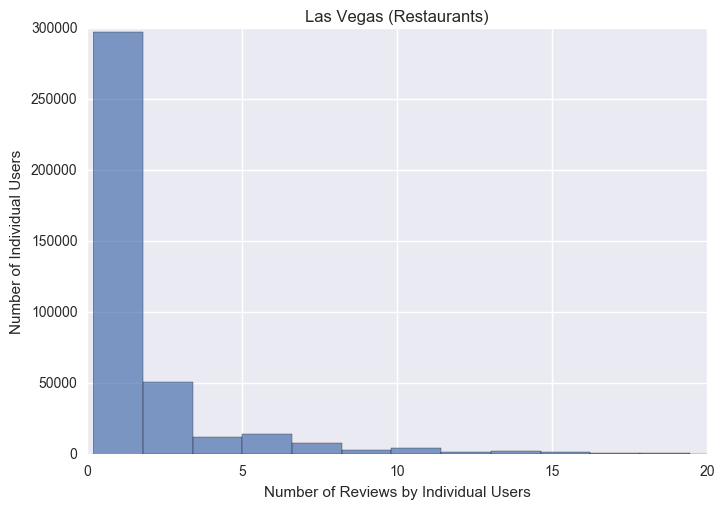

In [86]:
n_total, bins, patch = plt.hist(review_selected_region.user_id.value_counts(),bins=1000,alpha=0.7,align="left",normed=False,histtype="bar")
plt.title("{} ({})".format(selected_region,selected_business))
pylab.xlim([0,20])
plt.xlabel('Number of Reviews by Individual Users')
plt.ylabel('Number of Individual Users')
plt.show()

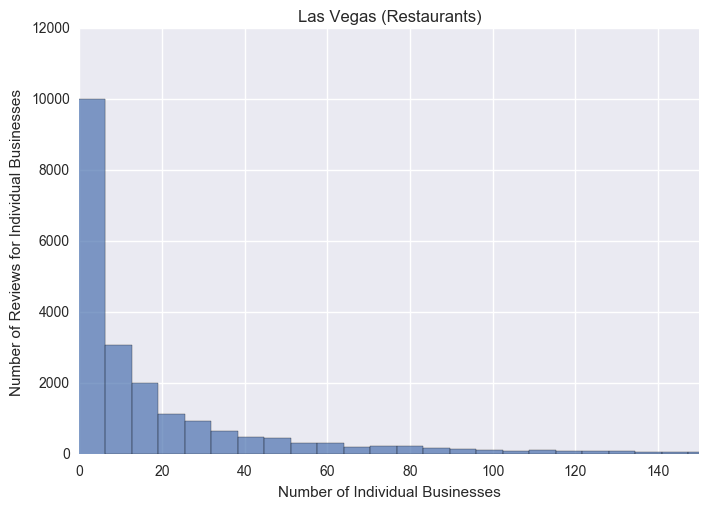

In [87]:
n_total, bins, patch = plt.hist(review_selected_region.business_id.value_counts(),bins=1000,\
                                alpha=0.7,align="left",normed=False,histtype="bar")
plt.title("{} ({})".format(selected_region,selected_business))
pylab.xlim([0,150])
plt.xlabel('Number of Individual Businesses')
plt.ylabel('Number of Reviews for Individual Businesses')
plt.show()

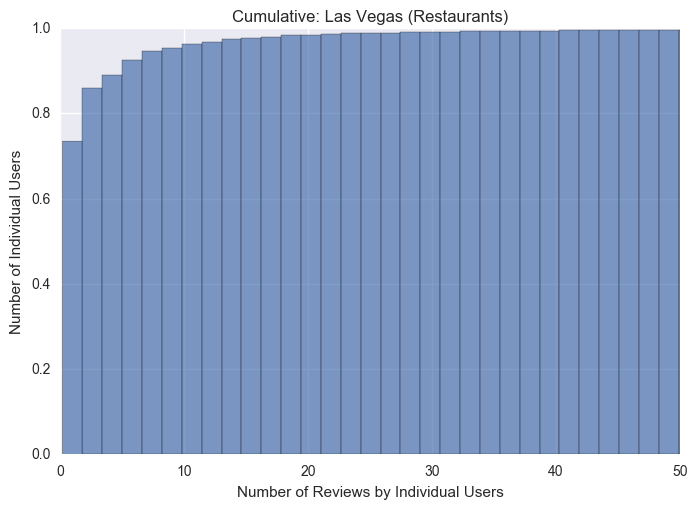

In [88]:
n_total, bins, patch = plt.hist(review_selected_region.user_id.value_counts(),bins=1000,\
                                alpha=0.7,align="left",normed=True,cumulative=True)
plt.title("Cumulative: {} ({})".format(selected_region,selected_business))
pylab.xlim([0,50])
plt.xlabel('Number of Reviews by Individual Users')
plt.ylabel('Number of Individual Users')
plt.show()

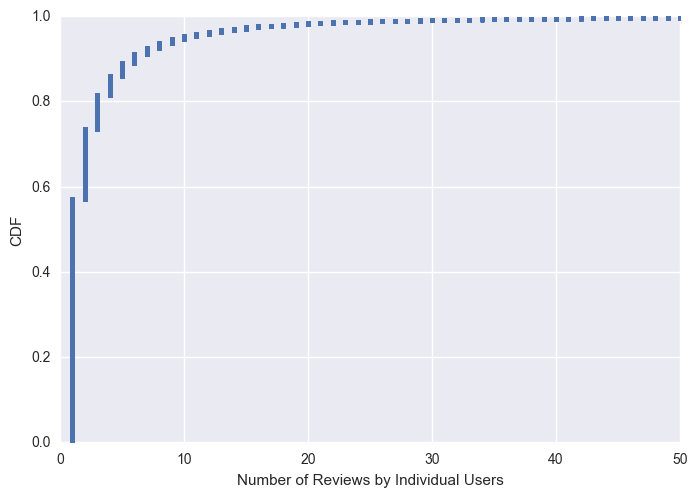

In [89]:
x = np.sort(review_selected_region.user_id.value_counts())
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
pylab.xlim([0,50])
plt.xlabel('Number of Reviews by Individual Users')
plt.ylabel('CDF')
plt.show()

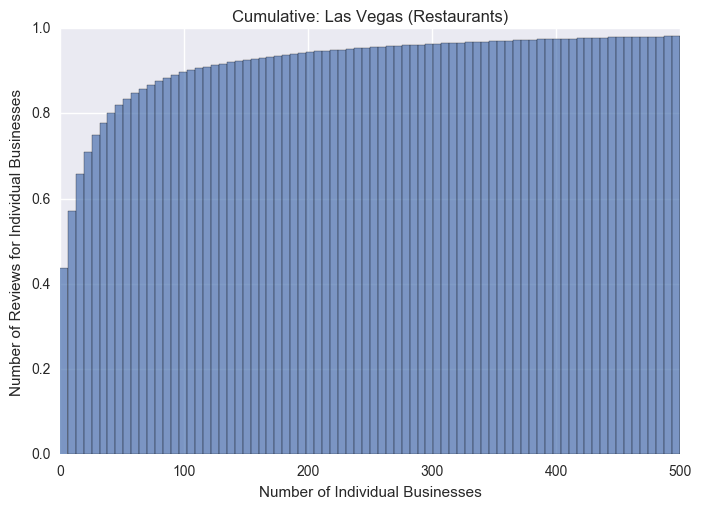

In [90]:
n_total, bins, patch = plt.hist(review_selected_region.business_id.value_counts(),bins=1000,\
                                alpha=0.7,align="left",normed=True,cumulative=True)
plt.title("Cumulative: {} ({})".format(selected_region,selected_business))
pylab.xlim([0,500])
pylab.ylim(0,1)
plt.xlabel('Number of Individual Businesses')
plt.ylabel('Number of Reviews for Individual Businesses')
plt.show()

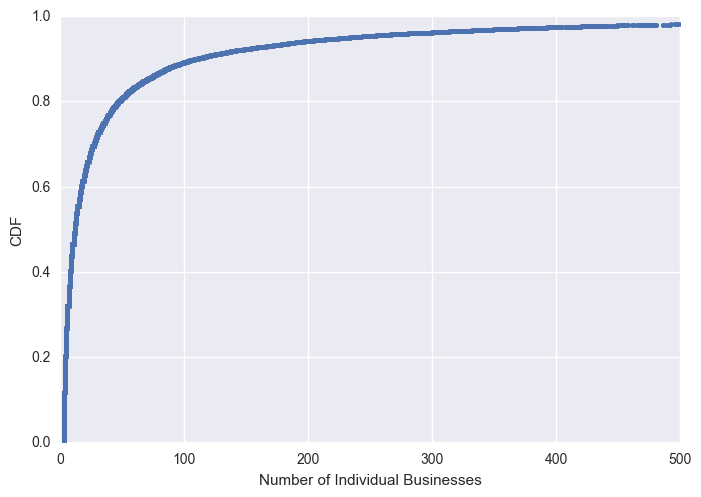

In [91]:
x = np.sort(review_selected_region.business_id.value_counts())
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
pylab.xlim([0,500])
plt.xlabel('Number of Individual Businesses')
plt.ylabel('CDF')
plt.show()

In [97]:
import powerlaw

In [98]:
results = powerlaw.Fit(review_selected_region.user_id.value_counts())
print ("Alpha: ", results.power_law.alpha)
print ("L: ", results.power_law.xmin)
print ("H: ", results.power_law.xmax)
R, p = results.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit


Alpha:  2.6713534861
L:  21.0
H:  None


In [99]:
results = powerlaw.Fit(review_selected_region.business_id.value_counts())
print ("Alpha: ", results.power_law.alpha)
print ("L: ", results.power_law.xmin)
print ("H: ", results.power_law.xmax)
R, p = results.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit


Alpha:  2.82440104533
L:  665.0
H:  None


In [129]:
plt.xscale("log")
plt.yscale("log")
las_vegas_df = business_df[business_df.city == \
                         '{}'.format(city1)].reset_index().review_count.value_counts().sort_values(ascending=False)
plt.plot(las_vegas_df,'.')